<a href="https://colab.research.google.com/github/apandit42/cs229tings/blob/master/YY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Machine Learning Implementations

1. Sampling
1. Logistic Regression
1. Naive Bayes
1. K Means Clustering
1. Hierarchical Clustering
1. GDA
1. SVM / Kernel Methods

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Sampling

In [ ]:
full_db = pd.read_csv('fifa_final_he.csv')

In [ ]:
# OVERALL
full_db.describe()

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga
count,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,...,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.00000,18593.000000,18593.000000,18593.000000,18593.000000
mean,9296.000000,9297.000000,2019.522293,164953.372560,28.127844,181.605766,76.000054,19.299790,3.786963,1391.172592,0.079640,0.056761,0.136052,0.008480,0.779066,1.087500,0.029264,76.187324,1.163904,0.845767,0.891102,0.139353,1.421850,0.605503,0.200147,0.000376,0.581895,0.587615,0.806564,0.124370,0.686481,0.963156,28.392906,0.273569,2.029118,0.026933,69.357930,66.862152,67.007476,59.049589,...,55.497230,52.250524,52.985102,58.185823,53.408218,50.758027,68.713333,67.449416,67.347066,68.317109,62.772549,72.229764,0.177594,0.086054,0.007691,0.120314,0.081213,0.077771,0.000054,0.058086,0.026784,0.003442,0.078632,0.000108,0.059431,0.023288,0.002851,0.139354,0.095466,0.028774,0.076050,0.106653,0.069004,0.098478,0.095627,0.09950,0.102243,0.076534,0.050879,0.089227
std,5367.481113,5367.481113,1.107716,121263.475259,4.463294,6.660206,7.040725,11.319614,4.305594,990.847871,0.130509,0.083046,0.132202,0.035322,0.749690,1.031797,0.054798,11.942106,0.855189,0.756195,0.580764,0.256074,1.568142,0.474918,0.268330,0.019400,0.548835,0.612600,0.625269,0.220553,0.623439,0.771600,15.015290,0.412373,2.088490,0.061862,11.739167,14.120024,13.923340,14.255352,...,17.487176,21.298349,21.611286,17.332688,22.651213,22.634730,8.815205,11.887291,14.413586,11.749744,16.667758,6.296319,0.382181,0.280451,0.087363,0.325337,0.273170,0.267818,0.007334,0.233913,0.161457,0.058570,0.269170,0.010371,0.236436,0.150822,0.053316,0.346324,0.293865,0.167176,0.265085,0.308680,0.253469,0.297968,0.294087,0.29934,0.302975,0.265858,0.219757,0.285079
min,0.000000,1.000000,2018.000000,70.000000,17.000000,156.000000,54.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
# GOLD
full_db[full_db.fifa_overall_category == 'gold'].describe()

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga
count,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.0,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,...,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000
mean,9323.911015,9324.911015,2019.467099,115132.571922,29.094456,182.027358,76.711879,25.540677,3.824190,1932.838445,0.121345,0.080771,0.143281,0.007277,1.016039,1.206110,0.046476,78.176551,1.237990,0.883221,0.932082,0.144681,1.446125,0.674495,0.205914,0.0,0.750591,0.744330,0.937209,0.159577,0.800037,1.066922,34.213147,0.335565,2.381213,0.042054,71.940965,68.798128,69.059755,65.450972,...,59.697768,55.767891,57.462779,61.578978,57.057595,53.826782,72.452844,69.878474,71.055148,70.823902,66.796688,78.455724,0.176962,0.088697,0.013391,0.132757,0.090857,0.059611,0.000144,0.053996,0.029374,0.004176,0.062923,0.000144,0.056875,0.023902,0.004896,0.136933,0.144708,0.031102,0.033837,0.187617,0.059755,0.103096,0.020158,0.180994,0.138661,0.044636,0.014399,0.033549
std,5407.944884,5407.944884,1.104605,98919.961907,4.053147,6.696029,7.202415,10.391506,4.548103,947.584539,0.161930,0.092959,0.111494,0.024863,0.891958,1.098790,0.063496,9.689062,0.833414,0.723308,0.556701,0.260076,1.563915,0.480460,0.259055,0.0,0.641872,0.709665,0.658522,0.250433,0.674814,0.808727,15.229210,0.477741,2.179956,0.073525,11.863154,14.227785,13.882220,13.704857,...,18.327045,22.941275,22.889759,19.055729,24.339509,24.788613,7.956018,11.664617,14.448462,11.144808,17.018038,3.355661,0.381664,0.284326,0.114950,0.339337,0.287426,0.236782,0.012000,0.226025,0.168864,0.064489,0.242842,0.012000,0.231621,0.152755,0.069802,0.343801,0.351832,0.173605,0.180823,0.390434,0.237050,0.304106,0.140552,0.385041,0.345617,0.206519,0.119137,0.180079
min,0.000000,1.000000,2018.000000,70.000000,17.000000,158.000000,56.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,20.000000

In [ ]:
# SILVER
full_db[full_db.fifa_overall_category ==  'silver'].describe()

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga
count,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,...,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.0,9631.000000,9631.000000,9631.00000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000
mean,9486.062922,9487.062922,2019.507528,175915.265497,28.118575,181.449382,75.844357,16.920984,3.808535,1182.915897,0.059857,0.045714,0.137192,0.009294,0.683283,1.086946,0.021409,75.264009,1.172679,0.873101,0.900783,0.144649,1.488651,0.589023,0.207625,0.000727,0.514914,0.526186,0.772925,0.112529,0.651242,0.945485,26.424247,0.253818,1.927729,0.019566,68.270377,66.137992,66.187104,56.586959,...,54.296231,51.319281,51.887758,57.359049,52.438168,49.959506,67.781435,66.780189,66.455093,67.903229,61.999481,70.083273,0.183782,0.086907,0.004465,0.106219,0.075174,0.089814,0.0,0.062091,0.023777,0.00270,0.089087,0.000104,0.059184,0.022116,0.001661,0.140276,0.069775,0.031046,0.102585,0.065310,0.085453,0.104039,0.129685,0.055342,0.087841,0.100924,0.032292,0.120756
std,5349.620629,5349.620629,1.107194,118718.253788,4.440662,6.675579,6.941408,10.028458,4.211429,868.783922,0.100752,0.072565,0.137356,0.037312,0.623515,1.000769,0.046151,11.807618,0.860778,0.778665,0.584227,0.254696,1.593692,0.461070,0.272918,0.026951,0.464747,0.531657,0.599251,0.205716,0.585840,0.743582,13.532930,0.375790,2.022702,0.051929,11.757996,14.120206,14.036271,13.046959,...,16.584664,20.276395,20.466916,16.046688,21.597053,21.449620,8.001784,11.917175,13.792274,11.535686,15.835634,2.735582,0.387326,0.281713,0.066673,0.308134,0.263685,0.285930,0.0,0.241334,0.152363,0.05189,0.284885,0.010190,0.235981,0.147069,0.040727,0.347291,0.254780,0.173450,0.303432,0.247085,0.279569,0.305327,0.335974,0.228659,0.283079,0.301244,0.176783,0.325860
min,40.000000,41.000000,2018.000000,188.000000,17.000000,156.000000,54.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,13

In [ ]:
# BRONZE
full_db[full_db.fifa_overall_category == 'bronze'].describe()

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,...,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,8292.361924,8293.361924,2019.782846,284155.885969,24.843827,180.900843,74.292514,9.169559,3.555776,520.498761,0.030501,0.026836,0.105715,0.008742,0.420467,0.681744,0.007503,73.746702,0.866907,0.586290,0.703769,0.095713,1.019298,0.446632,0.144585,0.0,0.320866,0.341325,0.517349,0.059686,0.463742,0.690243,17.752640,0.154417,1.300898,0.010043,65.656916,63.653941,63.858205,48.766981,...,46.768468,44.586019,42.807139,50.450174,45.474467,44.004462,60.287060,62.281111,58.838374,61.661874,52.607833,61.041646,0.150223,0.072881,0.003471,0.144769,0.076847,0.082796,0.0,0.053049,0.032226,0.004462,0.082796,0.0,0.069410,0.026772,0.001487,0.143282,0.048587,0.009916,0.094695,0.025285,0.022310,0.056024,0.192861,0.029747,0.045612,0.069906,0.265245,0.130392
std,5202.681778,5202.681778,1.085366,106026.304884,4.350345,6.367786,6.598739,8.090204,3.864134,616.052747,0.089403,0.072241,0.164724,0.052137,0.468869,0.813685,0.042919,17.384387,0.839872,0.706744,0.609325,0.244441,1.391309,0.475924,0.271276,0.0,0.373396,0.461161,0.498594,0.145948,0.525851,0.695378,12.532383,0.279688,1.818398,0.049589,9.133017,12.779348,12.460323,11.751867,...,14.334629,17.353258,17.974905,13.675035,18.702545,18.150754,8.330737,10.340378,12.829648,11.955220,14.304907,3.207483,0.357379,0.260005,0.058823,0.351956,0.266414,0.275642,0.0,0.224187,0.176644,0.066666,0.275642,0.0,0.254213,0.161458,0.038547,0.350447,0.215056,0.099107,0.292866,0.157029,0.147728,0.230025,0.394642,0.169931,0.208695,0.255051,0.441573,0.336817
min,293.000000,294.000000,2018.000000,4740.000000,17.000000,156.000000,57.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,15.000000,15.000000,19.000000,...,1

In [ ]:
# SETTING SEED
RAND_SEED = 69420360

In [ ]:
full_cat_db = pd.get_dummies(full_db, columns=['fifa_overall_category'])
full_cat_db.describe()

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga,fifa_overall_category_bronze,fifa_overall_category_gold,fifa_overall_category_silver
count,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,...,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.00000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000
mean,9296.000000,9297.000000,2019.522293,164953.372560,28.127844,181.605766,76.000054,19.299790,3.786963,1391.172592,0.079640,0.056761,0.136052,0.008480,0.779066,1.087500,0.029264,76.187324,1.163904,0.845767,0.891102,0.139353,1.421850,0.605503,0.200147,0.000376,0.581895,0.587615,0.806564,0.124370,0.686481,0.963156,28.392906,0.273569,2.029118,0.026933,69.357930,66.862152,67.007476,59.049589,...,58.185823,53.408218,50.758027,68.713333,67.449416,67.347066,68.317109,62.772549,72.229764,0.177594,0.086054,0.007691,0.120314,0.081213,0.077771,0.000054,0.058086,0.026784,0.003442,0.078632,0.000108,0.059431,0.023288,0.002851,0.139354,0.095466,0.028774,0.076050,0.106653,0.069004,0.098478,0.095627,0.09950,0.102243,0.076534,0.050879,0.089227,0.108482,0.373528,0.517991
std,5367.481113,5367.481113,1.107716,121263.475259,4.463294,6.660206,7.040725,11.319614,4.305594,990.847871,0.130509,0.083046,0.132202,0.035322,0.749690,1.031797,0.054798,11.942106,0.855189,0.756195,0.580764,0.256074,1.568142,0.474918,0.268330,0.019400,0.548835,0.612600,0.625269,0.220553,0.623439,0.771600,15.015290,0.412373,2.088490,0.061862,11.739167,14.120024,13.923340,14.255352,...,17.332688,22.651213,22.634730,8.815205,11.887291,14.413586,11.749744,16.667758,6.296319,0.382181,0.280451,0.087363,0.325337,0.273170,0.267818,0.007334,0.233913,0.161457,0.058570,0.269170,0.010371,0.236436,0.150822,0.053316,0.346324,0.293865,0.167176,0.265085,0.308680,0.253469,0.297968,0.294087,0.29934,0.302975,0.265858,0.219757,0.285079,0.310996,0.483753,0.499690
min,0.000000,1.000000,2018.000000,70.000000,17.000000,156.000000,54.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
rank_db = full_cat_db.drop(columns=['Unnamed: 0', 'fifa_year', 'name', 'first_name', 'last_name', 'ws_season', 'ws_team_name', 'ws_player_id'])
rank_db = rank_db[rank_db.min_played >= 90]
rank_db = pd.concat([rank_db.iloc[:, :32], rank_db.iloc[:, -3:]], axis=1)
rank_db.head()

,id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,fifa_overall_category_bronze,fifa_overall_category_gold,fifa_overall_category_silver
0,1,32,184,80,41,0,3649,1.195122,0.219512,0.121951,0.000000,4.825806,2.416129,0.317073,75.885572,0.790323,0.212903,1.066129,0.016129,0.609677,0.593548,0.016129,0,1.630645,1.535484,1.493548,0.474194,1.470968,2.056452,24.770968,0.261290,0.491935,0,1,0
1,2,33,170,72,41,2,3542,0.682927,0.585366,0.146341,0.000000,4.346591,0.339015,0.634146,82.224473,0.443182,0.231061,0.678030,0.000000,0.015152,0.585227,0.000000,0,2.410985,6.320076,2.248106,0.259470,2.369318,1.857955,53.361742,0.596591,2.200758,0,1,0
2,3,28,175,68,22,1,1907,0.727273,0.454545,0.227273,0.045455,4.080952,0.176190,0.454545,77.566742,0.900000,0.276190,1.109524,0.000000,0.000000,1.028571,0.000000,0,2.442857,6.071429,4.280952,0.247619,3.104762,4.576190,52.485714,0.685714,1.790476,0,1,0
3,4,27,188,89,34,0,3040,0.705882,0.058824,0.147059,0.000000,3.696552,2.075862,0.176471,71.118574,0.610345,0.103448,1.037931,0.000000,0.917241,0.424138,0.120690,0,0.865517,1.282759,1.458621,0.644828,0.951724,1.872414,19.334483,0.168966,0.996552,0,1,0
4,5,30,183,76,41,4,3196,0.121951,0.146341,0.073171,0.000000,1.980952,0.254762,0.073171,93.646575,2.050000,1.078571,0.816667,0.014286,0.352381,1.742857,0.000000,0,2.871429,1.011905,1.364286,0.111905,0.602381,0.895238,75.038095,1.402381,7.804762,0,1,0


In [ ]:
# Imports
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import pickle

In [ ]:
rank_train, rank_test = train_test_split(rank_db, test_size=0.2, random_state=RAND_SEED)

In [ ]:
# Plot everything all at once
def all_validation_plots(clf, x_test, y_test, y_pred=None, labels=None):
  print("Model Accuracy: ", end='')
  if y_pred is None:
    print(skm.accuracy_score(y_test, clf.predict(x_test)))
  else:
    print(skm.accuracy_score(y_test, y_pred))
  print("Confusion Matrix:")
  skm.plot_confusion_matrix(clf, x_test, y_test, labels=labels, normalize='all')
  print("Precision Recall Curve:")
  skm.plot_precision_recall_curve(clf, x_test, y_test)
  print("ROC Curve:")
  skm.plot_roc_curve(clf, x_test, y_test)
  
# Our K-Fold Implementation
def kfold(clf, x, y):
  kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=RAND_SEED)
  accuracy_list = []
  for train, test in kf.split(x, y):
    clf.fit(x.iloc[train], y.iloc[train])
    y_preds = clf.predict(x.iloc[test])
    accuracy_list.append(skm.accuracy_score(y.iloc[test], y_preds))
  print(f"Mean Accuracy: {np.mean(accuracy_list)}\t Variance: {np.var(accuracy_list)}")
  return accuracy_list

# Our K-Fold Group
def group_kfold(clf, x, y, groups):
  kf = sklearn.model_selection.GroupKFold(n_splits=5)
  accuracy_list = []
  for train, test in kf.split(x, y, groups=groups):
    clf.fit(x.iloc[train], y.iloc[train])
    y_preds = clf.predict(x.iloc[test])
    accuracy_list.append(skm.accuracy_score(y.iloc[test], y_preds))
  print(f"Mean Accuracy: {np.mean(accuracy_list)}\t Variance: {np.var(accuracy_list)}")
  return accuracy_list
    

In [ ]:
# Naive Bayes vs Dummmy Head 2 Head
y_train = rank_train.iloc[:, -1]
x_train = rank_train.iloc[:, 1:-3]
clf = GaussianNB()

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# acc1 = kfold(clf, x_train, y_train)
acc2 = group_kfold(clf, x_train, y_train, rank_train.id)
# all_validation_plots(clf, x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean Accuracy: 0.6347779073493337	 Variance: 0.0001706729902723085


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Later Graphs

## Validation Curves

https://scikit-learn.org/stable/modules/learning_curve.html

## Precision Recall Curves

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

**Used for imbalanced datasets.**

## ROC Curves

## Confusion Matrix Plots

## Visualizations

https://scikit-learn.org/stable/visualizations.html#available-plotting-utilities

# Cross Validation
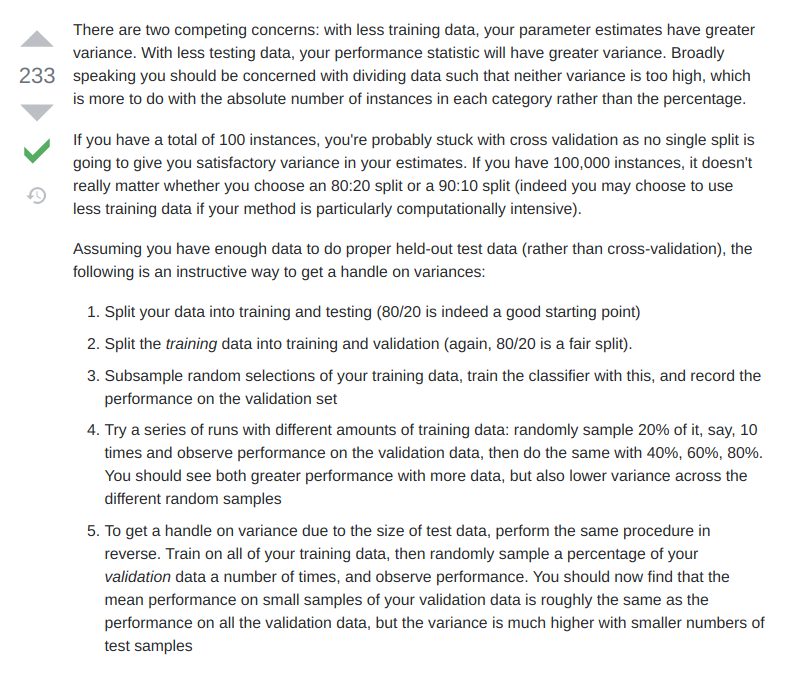

1. Logistic Regression

2. Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
gold_subset = real_stats_subset.drop(columns=['fifa_overall_category_bronze', 'fifa_overall_category_silver'])
silver_subset = real_stats_subset.drop(columns=['fifa_overall_category_bronze', 'fifa_overall_category_gold'])
bronze_subset = real_stats_subset.drop(columns=['fifa_overall_category_gold', 'fifa_overall_category_silver'])

gx_train, gx_test, gy_train, gy_test = train_test_split(gold_subset.iloc[:, :-1], gold_subset.iloc[:, -1], test_size=0.34, random_state=RAND_SEED)
sx_train, sx_test, sy_train, sy_test = train_test_split(silver_subset.iloc[:, :-1], silver_subset.iloc[:, -1], test_size=0.34, random_state=RAND_SEED)
bx_train, bx_test, by_train, by_test = train_test_split(bronze_subset.iloc[:, :-1], bronze_subset.iloc[:, -1], test_size=0.34, random_state=RAND_SEED)

In [ ]:
gy_train.head()

18100    0
9424     1
16807    1
2028     1
3009     0
Name: fifa_overall_category_gold, dtype: uint8

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(gx_train, gy_train)
y_pred = clf.predict(gx_test)
print(f"Gold Accuracy: {accuracy_score(gy_test, y_pred)}")

clf = GaussianNB()

clf.fit(bx_train, by_train)
y_pred = clf.predict(bx_test)
print(f"Bronze Accuracy: {accuracy_score(by_test, y_pred)}")

Gold Accuracy: 0.713540018981335
Bronze Accuracy: 0.7692186017083201
